In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
data = pd.read_csv("parkinsons1.csv")

In [3]:
data.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

In [4]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

**insights**
This is a binary classifier problem. status is the target variable with values 0 and 1.

In [5]:
data.shape

(195, 24)

Total 195 rows and 24 columns present in the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

name is object and status , target variable is int.

In [7]:
data.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

mean and std look good. there are some negative values in the data. all are continous variables

In [8]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

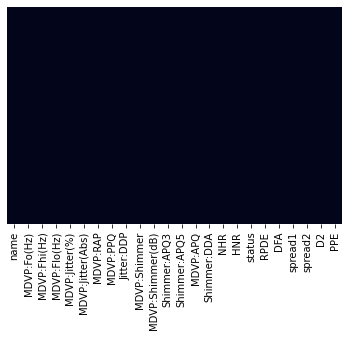

In [9]:
sns.heatmap(data.isna(), yticklabels =False,cbar=False)

In [10]:
data.drop("name", axis =1, inplace = True )

In [11]:
(data<0).any().any() # check if data has any negatives

True

copydata = data.copy()
def chkneg(x):
        if x<0:
            return np.NaN
        else:
            return x
    
copydata["spread1"]= copydata["spread1"].apply(chkneg)
    

sns.heatmap(copydata.isna(), yticklabels=False,cbar=False)

copydata["spread1"]= copydata["spread1"].fillna(copydata["spread1"].mean())

data = copydata


In [12]:
(data<0).any()

MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1              True
spread2             False
D2                  False
PPE                 False
dtype: bool

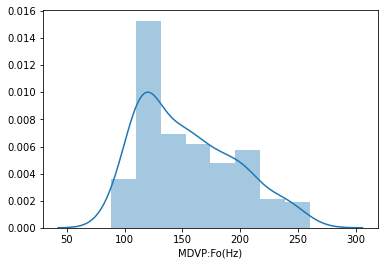

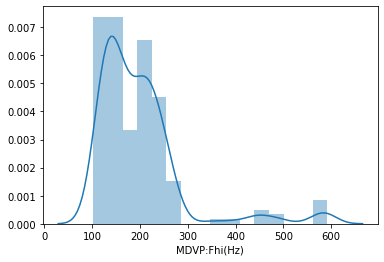

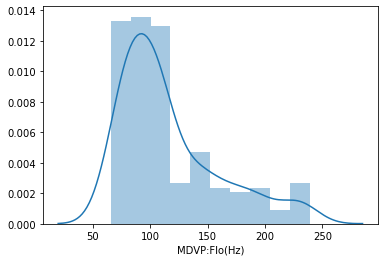

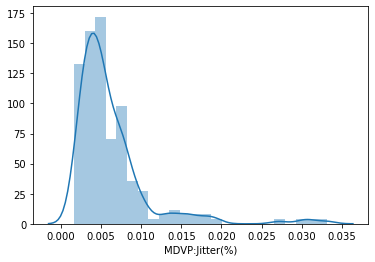

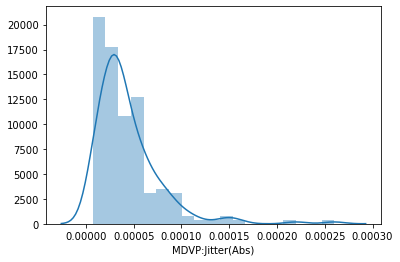

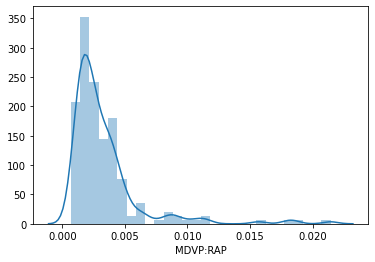

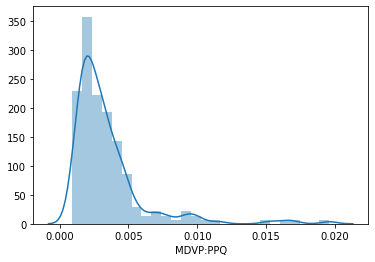

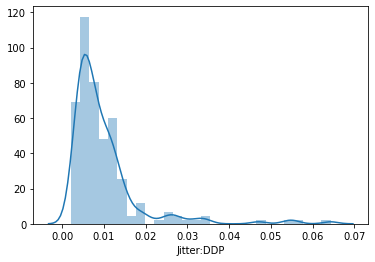

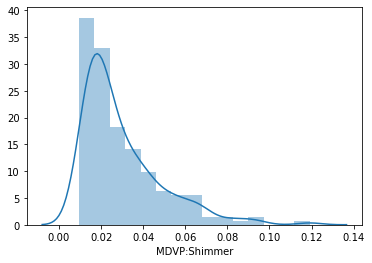

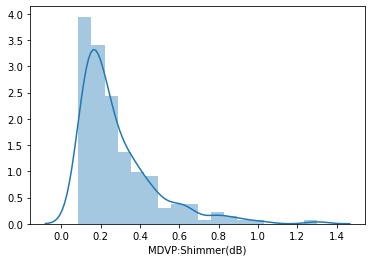

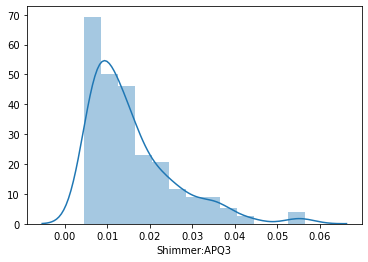

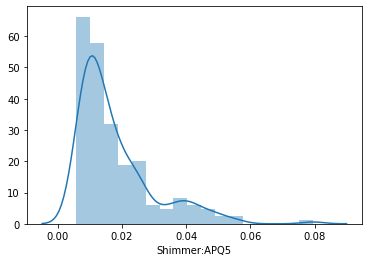

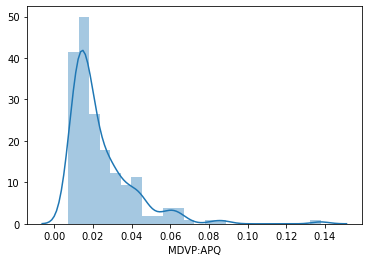

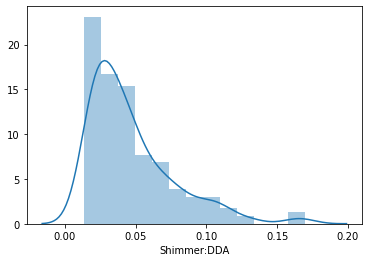

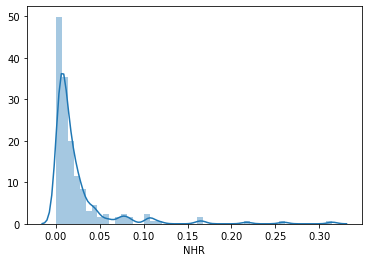

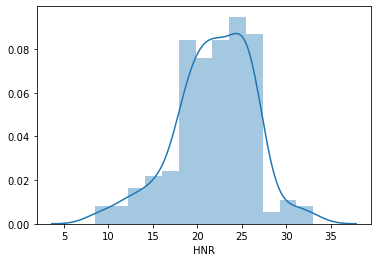

C:\Users\srisi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


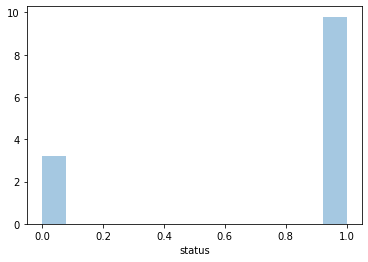

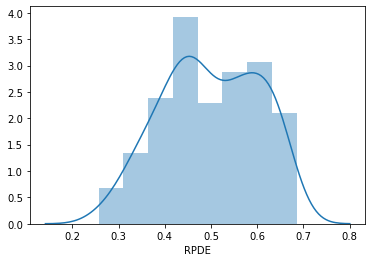

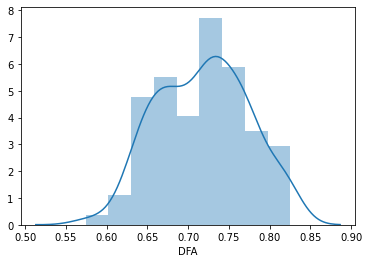

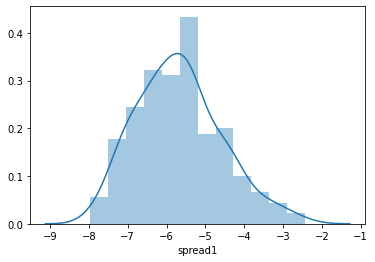

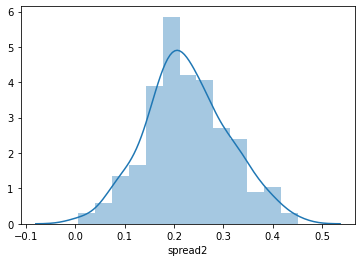

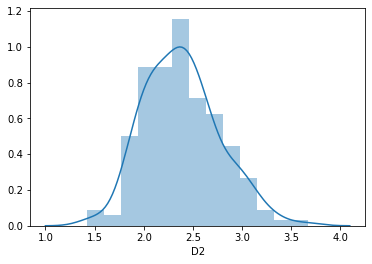

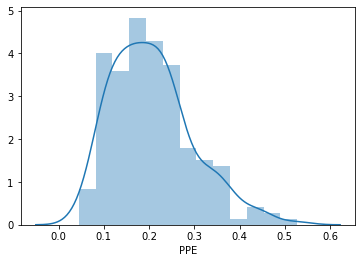

In [13]:
for column in data.columns:
    sns.distplot(data[column])
    plt.show()
    

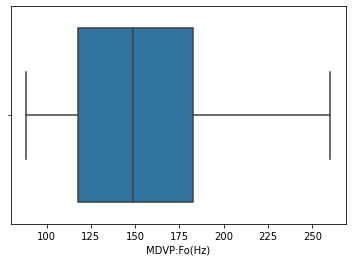

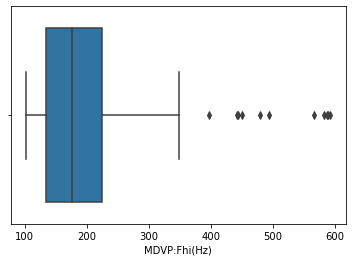

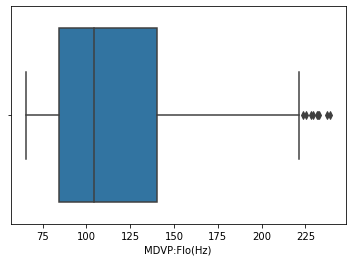

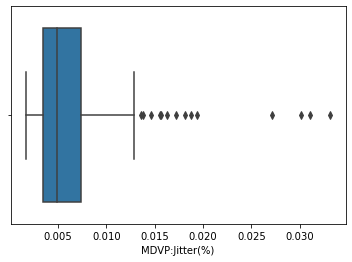

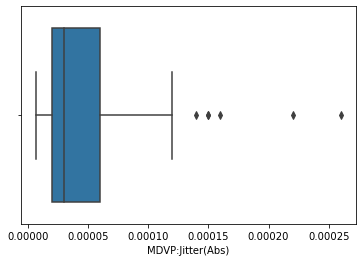

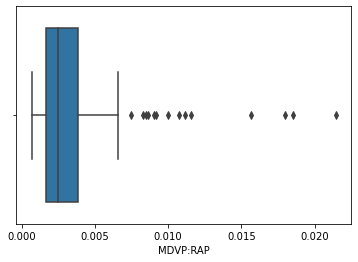

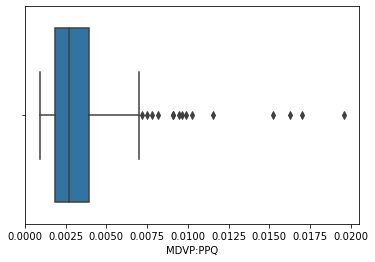

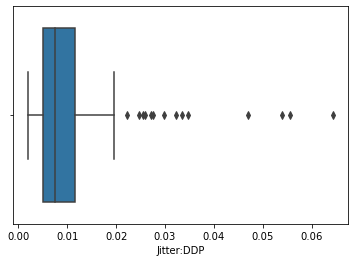

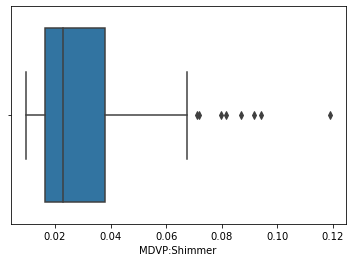

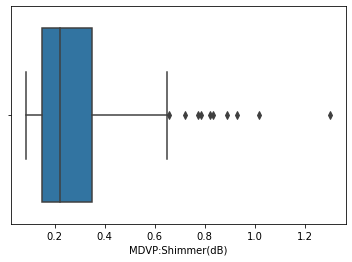

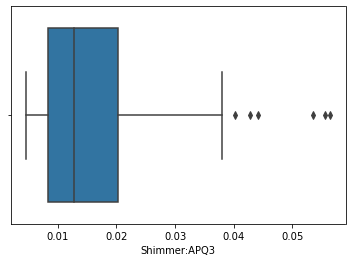

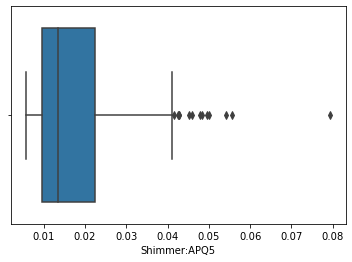

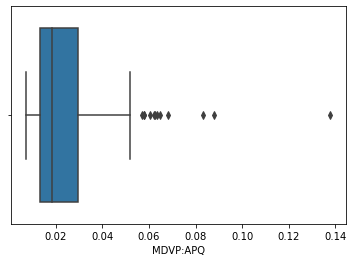

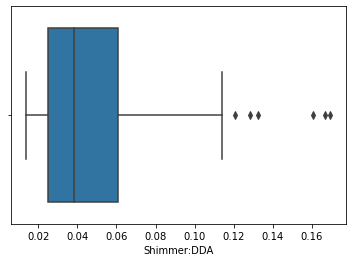

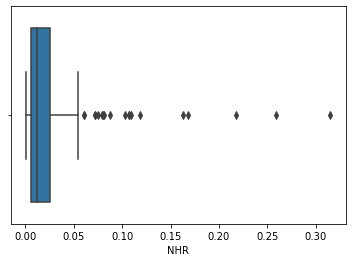

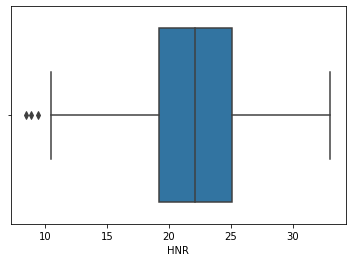

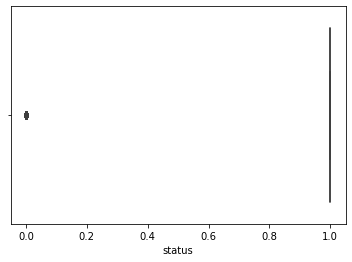

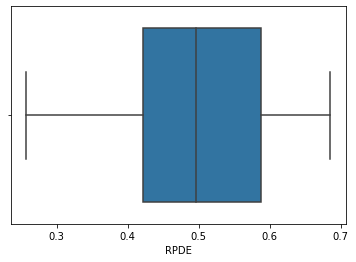

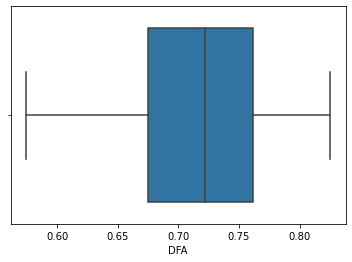

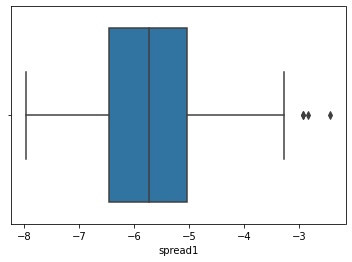

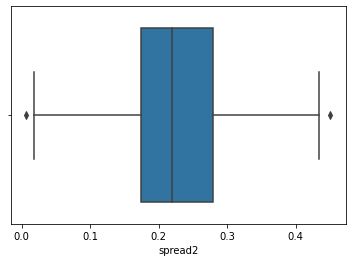

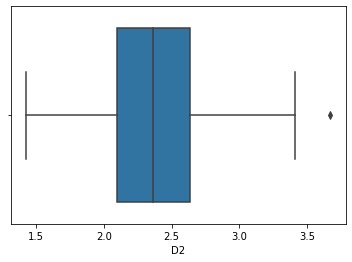

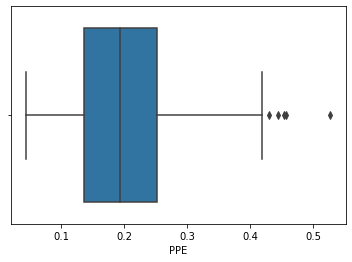

In [14]:
for column in data.columns:
    sns.boxplot(data[column])
    plt.show()

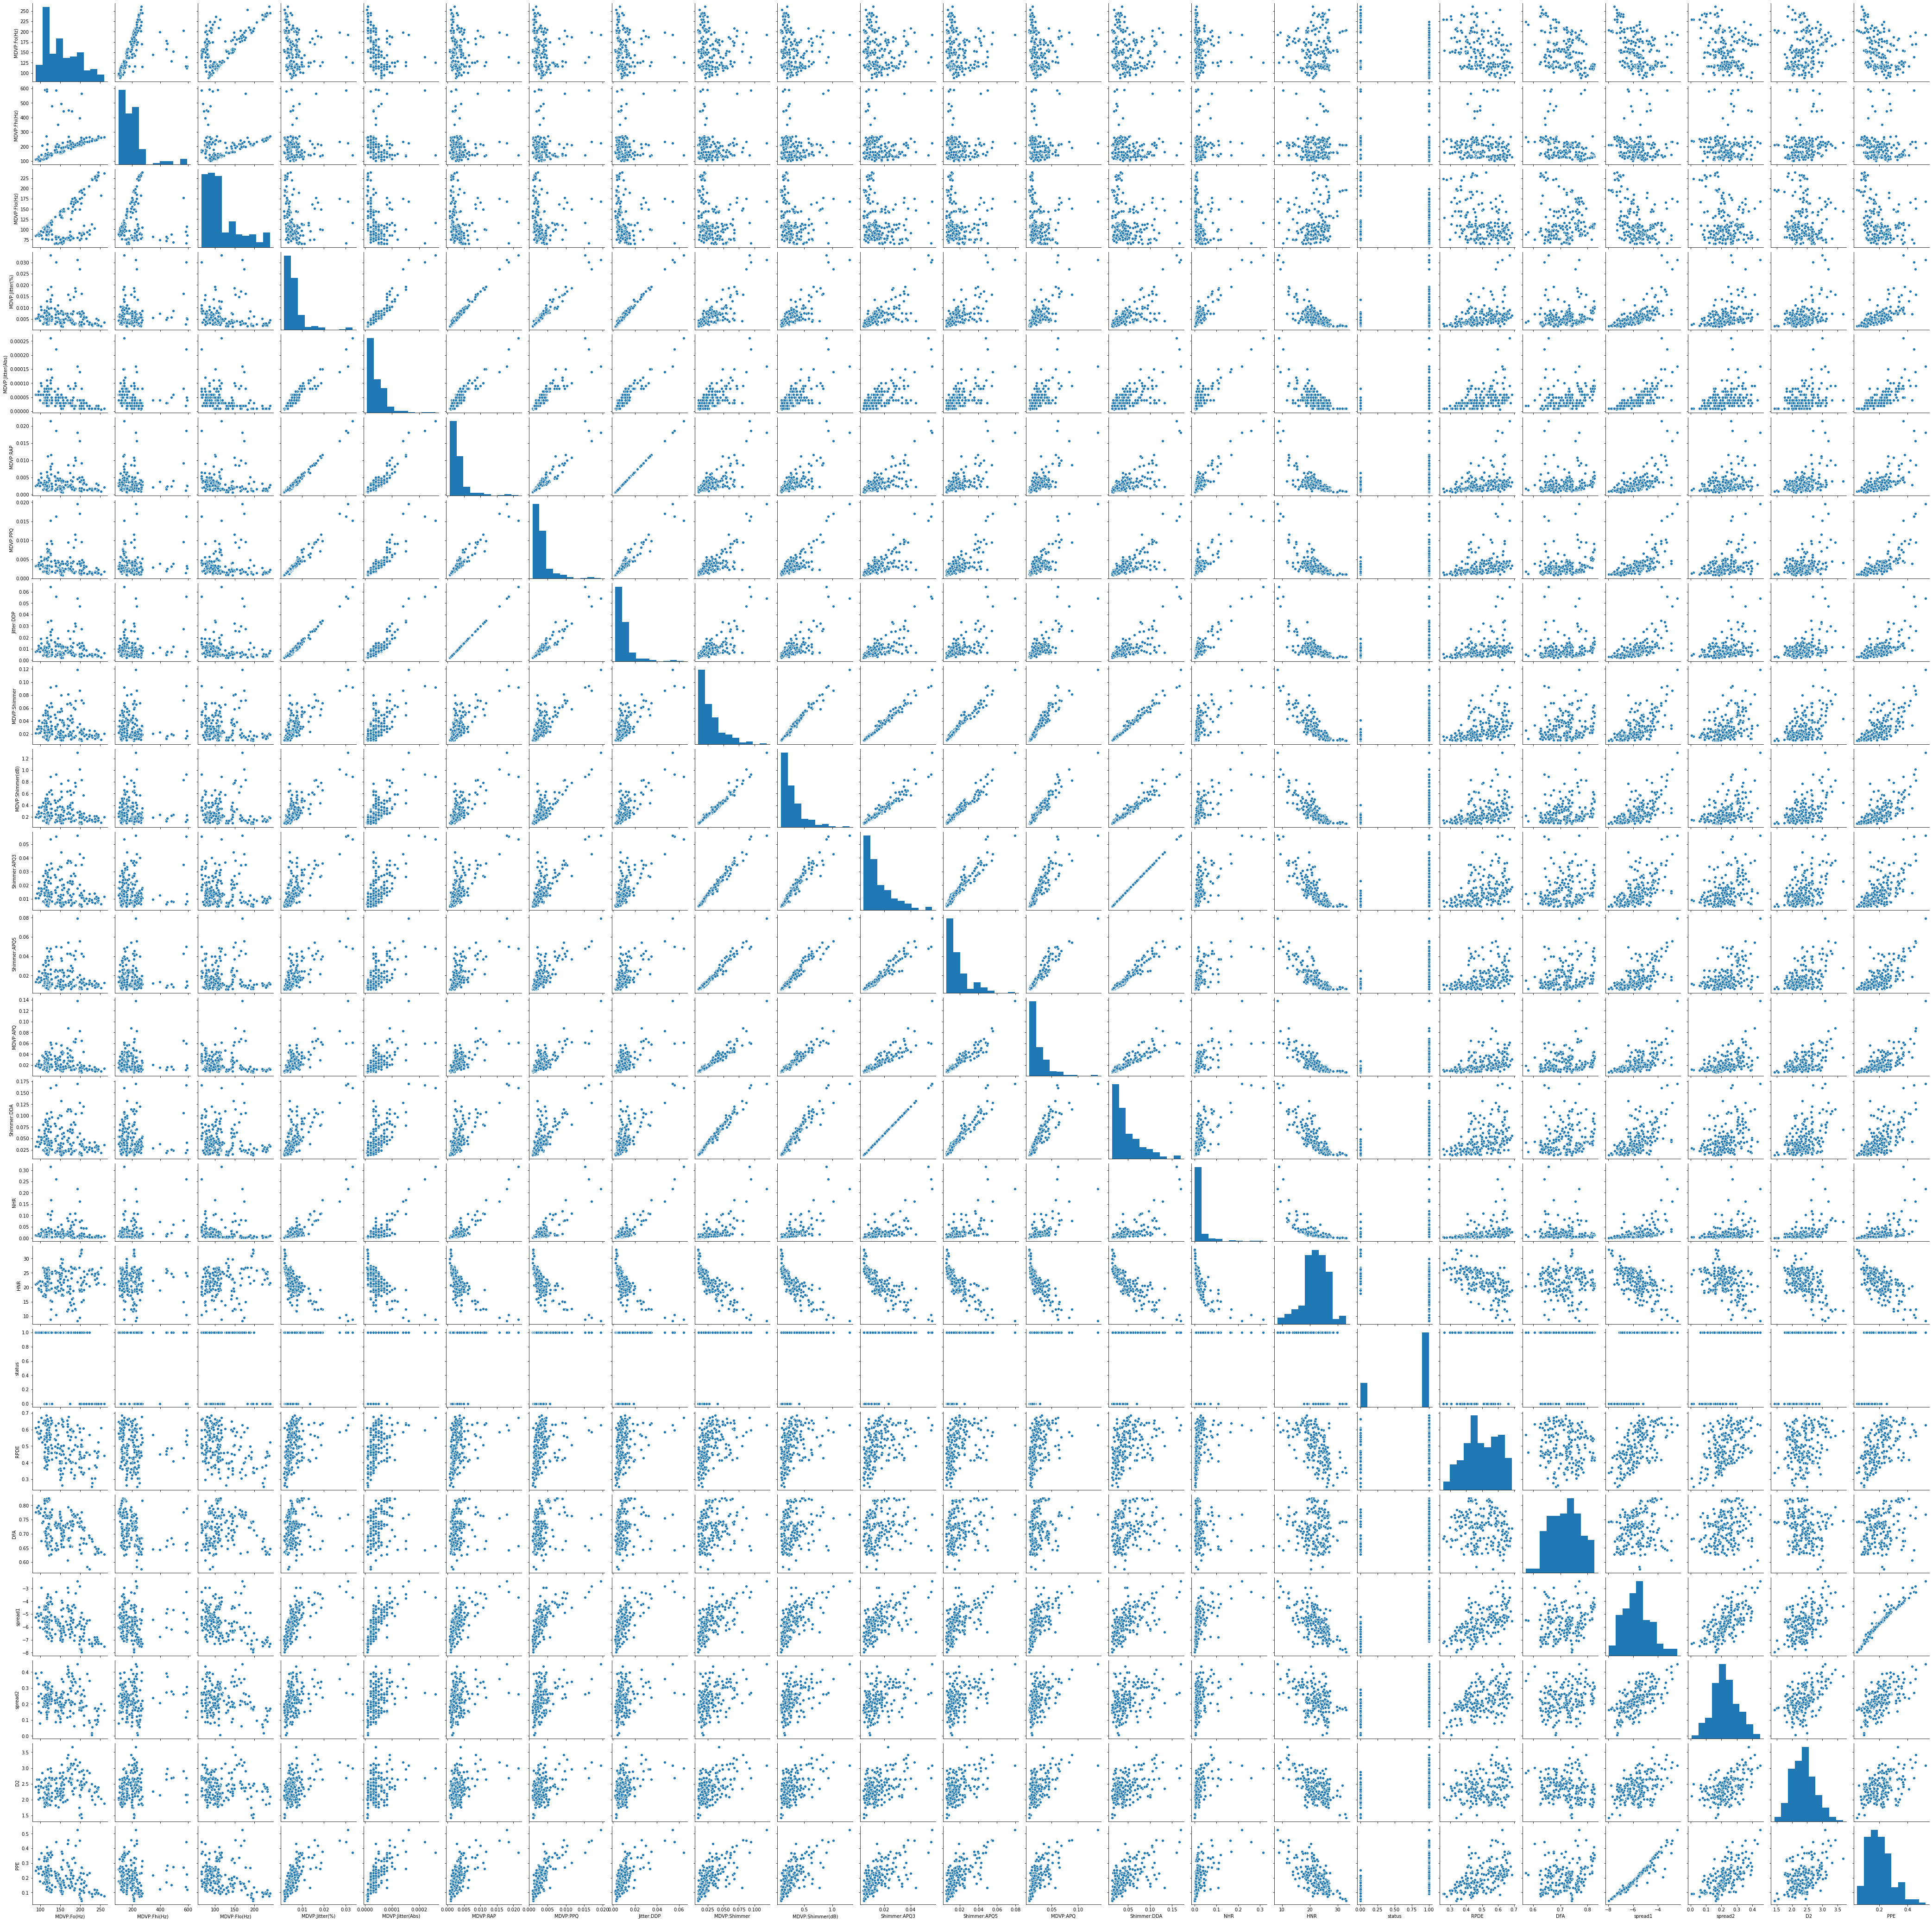

In [15]:
sns.pairplot(data)

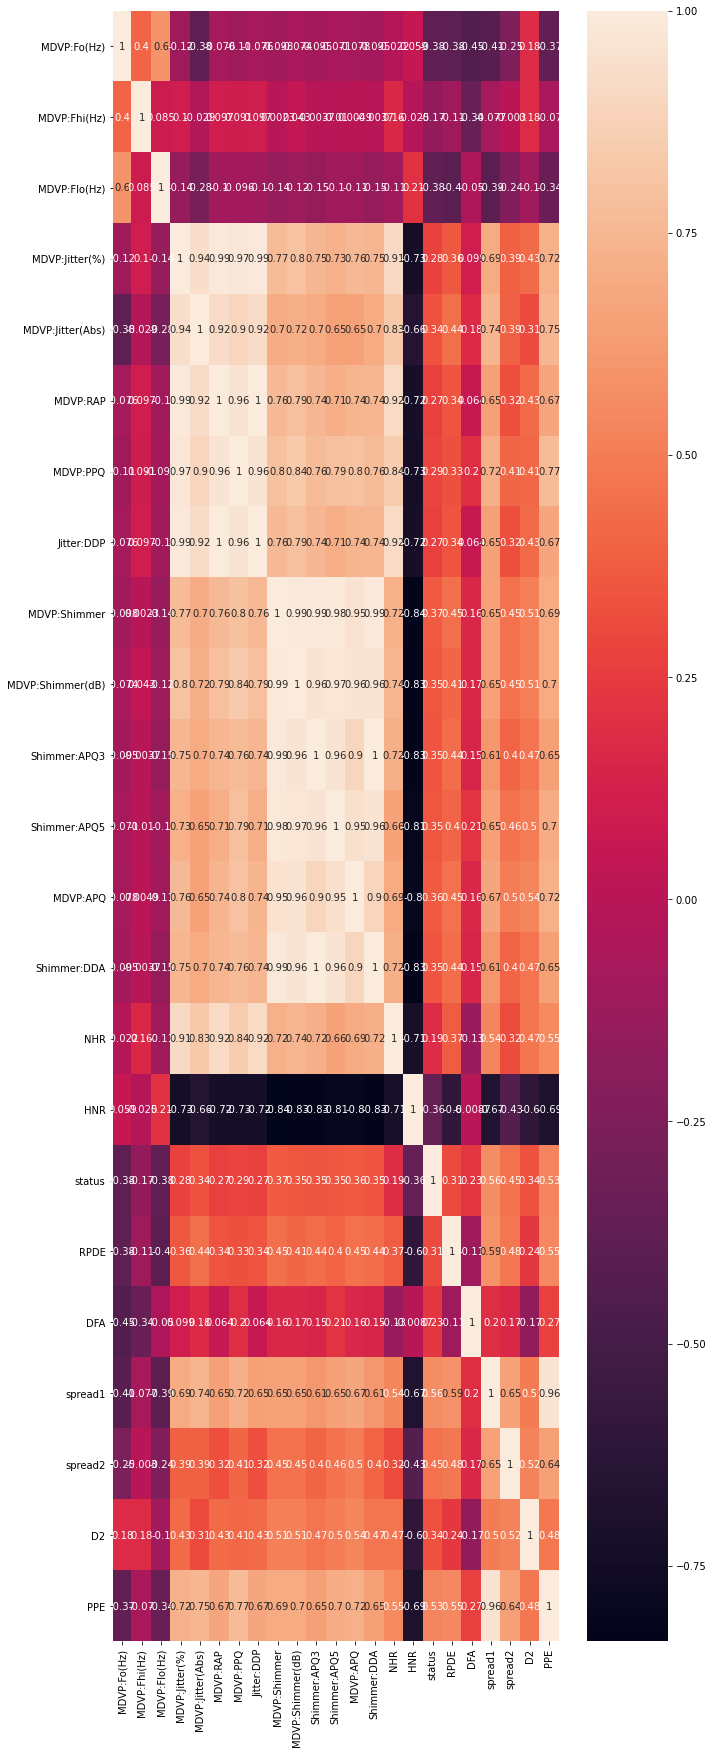

In [16]:
plt.figure(figsize=(10,30))
corr = data.corr()
sns.heatmap(corr,annot = True)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score,roc_auc_score,precision_score
from sklearn.linear_model import LogisticRegression


splitdata= data.copy()

In [60]:
X = splitdata.drop('status', axis =1)
y= splitdata['status']

In [61]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 22)
(59, 22)
(136,)
(59,)


In [62]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(splitdata))*100))
print("{0:0.2f}% data is in training set".format((len(X_test)/len(splitdata))*100))



69.74% data is in training set
30.26% data is in training set


In [63]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scalar = MinMaxScaler()

X_train = pd.DataFrame(scalar.fit_transform(X_train))
X_test = pd.DataFrame(scalar.transform(X_test))



In [64]:
X_train

0         1         2         3         4         5         6   \
0    0.138655  0.060702  0.186531  0.108099  0.163347  0.096538  0.095624   
1    0.515165  0.232636  0.107579  0.089286  0.083665  0.056558  0.061588   
2    0.498131  0.224529  0.053548  0.085459  0.083665  0.070210  0.079417   
3    0.608277  0.251420  0.601285  0.933355  0.601594  0.832277  1.000000   
4    0.677241  0.244987  0.722500  0.210778  0.123506  0.199415  0.204214   
..        ...       ...       ...       ...       ...       ...       ...   
131  0.583838  0.234711  0.584926  0.490753  0.322709  0.440273  0.497029   
132  0.144570  0.057826  0.204840  0.102679  0.123506  0.079961  0.110751   
133  0.197954  0.082702  0.170625  0.174426  0.203187  0.156997  0.125338   
134  0.313404  0.237081  0.102912  0.060268  0.083665  0.031204  0.051864   
135  0.222266  0.081442  0.199584  0.559949  0.561753  0.519746  0.477039   

           7         8         9   ...        12        13        14  \
0    0.096669  0.073215  0.057518  ...  0.049315  0.096234  0.043394   
1    0.056864  0.019628  0.026294  ...  0.029482  0.012617  0.034670   
2    0.070187  0.527022  0.464256  ...  0.312658  0.640875  0.131869   
3    0.832331  1.000000  1.000000  ...  1.000000  1.000000  0.688984   
4    0.199513  0.129998  0.102712  ...  0.080251  0.156035  0.039605   
..        ...       ...       ...  ...       ...       ...       ...   
131  0.440130  0.562717  0.523418  ...  0.467494  0.580303  0.254600   
132  0.080260  0.394833  0.321282  ...  0.261505  0.468748  0.115186   
133  0.157271  0.122238  0.113394  ...  0.080557  0.142131  0.099300   
134  0.031357  0.050119  0.033689  ...  0.049008  0.058513  0.024419   
135  0.519578  0.527661  0.471652  ...  0.387779  0.606759  0.530786   

           15        16        17        18        19        20        21  
0    0.527080  0.662958  0.393632  0.404323  0.402103  0.166566  0.331571  
1    0.772388  0.250010  0.326287  0.573892  0.619838  0.529658  0.379156  
2    0.259786  0.774316  0.675900  0.373230  0.660753  0.692406  0.292664  
3    0.000000  0.844023  0.773041  1.000000  1.000000  0.725814  1.000000  
4    0.530627  0.509920  0.588842  0.542952  0.463240  0.400427  0.449897  
..        ...       ...       ...       ...       ...       ...       ...  
131  0.159097  0.651974  0.755974  0.823474  0.740813  0.816437  0.769281  
132  0.342614  0.842697  0.535186  0.584392  0.670464  0.537356  0.463145  
133  0.598606  0.806698  0.197003  0.438386  0.504837  0.549994  0.348888  
134  0.690261  0.686318  0.334506  0.456162  0.459033  0.321125  0.378689  
135  0.164749  0.877381  0.401070  0.751796  0.532591  0.519880  0.684050  

[136 rows x 22 columns]

In [65]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((136, 22), (59, 22), (136,), (59,))

In [66]:
model = LogisticRegression(solver = "liblinear")
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

acc= model.score(X_test, y_test)


In [67]:
acc

0.8135593220338984

In [68]:
resultsdf = pd.DataFrame({"Method": ["Logistic Regression"],
                           "Training Accuracy": model.score(X_train,y_train),
                            "Testing Accuracy": model.score(X_test, y_test),
                            "ROC Score" : roc_auc_score(y_test,y_predict),
                            "Recall Score": recall_score(y_test,y_predict),
                            "Precision" :  precision_score(y_test,y_predict),
                            "F1 Score" : f1_score(y_test,y_predict)
                         })
resultsdf

Method  Training Accuracy  Testing Accuracy  ROC Score  \
0  Logistic Regression           0.852941          0.813559   0.746499   

   Recall Score  Precision  F1 Score  
0      0.904762   0.844444  0.873563

###decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
from IPython.display import Image

dtree = DecisionTreeClassifier(criterion='gini',random_state =1)
dtree.fit(X_train,y_train)
y_predict = model.predict(X_test)


In [70]:
train_char_label = ['No','Yes']
tree_file = open('tree.dot','w')
#dot_data = tree.export_graphviz(dtree, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

dot_tree = tree.export_graphviz(dtree,out_file =tree_file, feature_names = list(X_train), class_names=list(train_char_label))
tree_file.close()


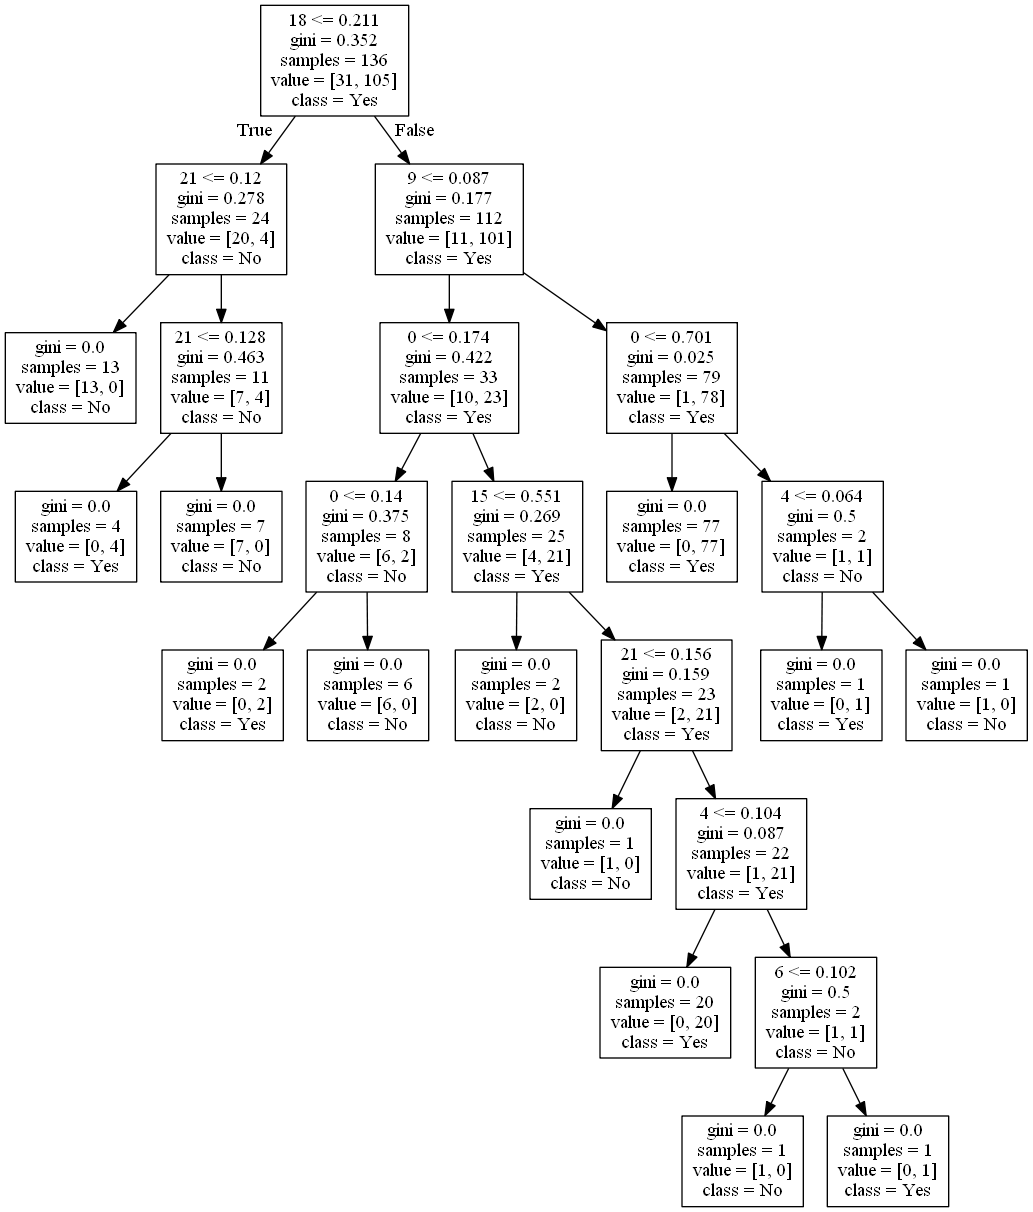

In [71]:
retcode = system("dot -Tpng tree.dot -o tree.png")
if  retcode > 0:
    print("system command returnig error" +str(retcode))
else:
    display(Image("tree.png"))

In [72]:
prunedtree= DecisionTreeClassifier(criterion='gini',random_state =1, max_depth = 4)
prunedtree.fit(X_train, y_train)
y_predict= model.predict(X_test)

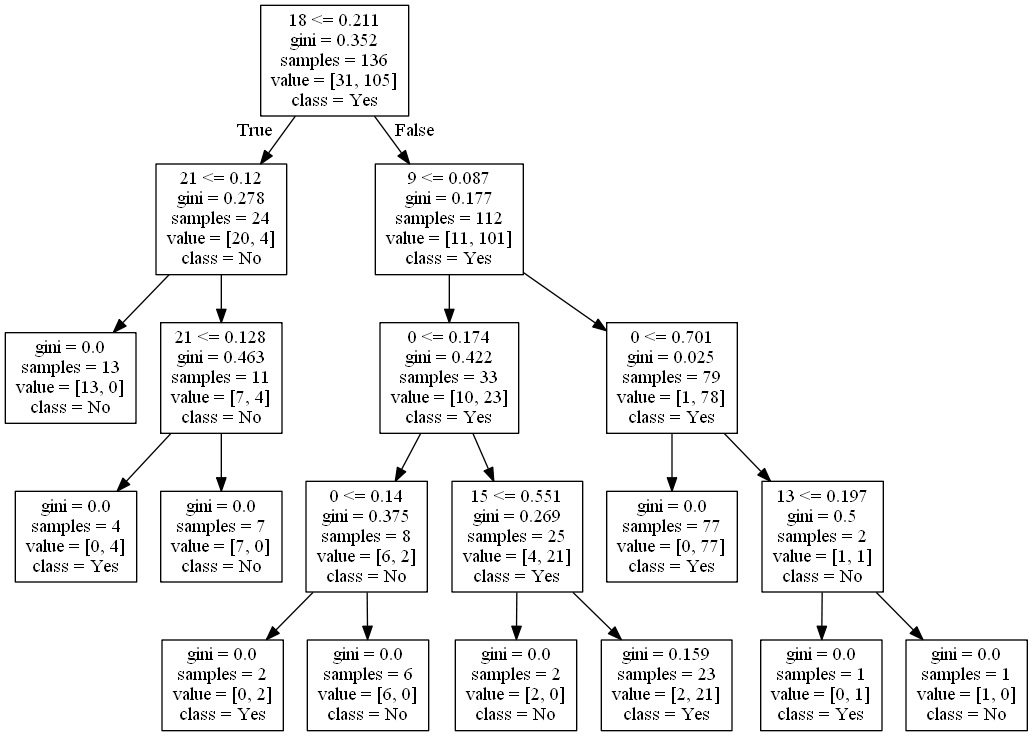

In [73]:
train_char_label = ['No','Yes']
tree_file = open('tree.dot','w')
#dot_data = tree.export_graphviz(dtree, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

dot_tree = tree.export_graphviz(prunedtree,out_file =tree_file, feature_names = list(X_train), class_names=list(train_char_label))
tree_file.close()

retcode = system("dot -Tpng tree.dot -o tree.png")
if  retcode > 0:
    print("system command returnig error" +str(retcode))
else:
    display(Image("tree.png"))

In [74]:
tempres = pd.DataFrame({"Method": [" Decision Tree "],
                           "Training Accuracy": dtree.score(X_train,y_train),
                            "Testing Accuracy": dtree.score(X_test, y_test),
                            "ROC Score" : roc_auc_score(y_test,y_predict),
                            "Recall Score": recall_score(y_test,y_predict),
                            "Precision" :  precision_score(y_test,y_predict),
                            "F1 Score" : f1_score(y_test,y_predict)
                         })
resultsdf = resultsdf.append(tempres)

In [75]:
resultsdf

Method  Training Accuracy  Testing Accuracy  ROC Score  \
0  Logistic Regression           0.852941          0.813559   0.746499   
0       Decision Tree            1.000000          0.864407   0.746499   

   Recall Score  Precision  F1 Score  
0      0.904762   0.844444  0.873563  
0      0.904762   0.844444  0.873563

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators = 50, random_state =1,max_features = 10)
rfmodel.fit(X_train, y_train)
y_rfpredict = rfmodel.predict(X_test)




In [77]:
tempres = pd.DataFrame({"Method": [" Random Forest "],
                           "Training Accuracy": rfmodel.score(X_train,y_train),
                            "Testing Accuracy": rfmodel.score(X_test, y_test),
                            "ROC Score" : roc_auc_score(y_test,y_rfpredict),
                            "Recall Score": recall_score(y_test,y_rfpredict),
                            "Precision" :  precision_score(y_test,y_rfpredict),
                            "F1 Score" : f1_score(y_test,y_rfpredict)
                         })
resultsdf = resultsdf.append(tempres)

In [78]:
resultsdf

Method  Training Accuracy  Testing Accuracy  ROC Score  \
0  Logistic Regression           0.852941          0.813559   0.746499   
0       Decision Tree            1.000000          0.864407   0.746499   
0       Random Forest            1.000000          0.864407   0.834734   

   Recall Score  Precision  F1 Score  
0      0.904762   0.844444  0.873563  
0      0.904762   0.844444  0.873563  
0      0.904762   0.904762  0.904762

In [79]:
from sklearn.ensemble import AdaBoostClassifier
admodel = AdaBoostClassifier(n_estimators = 50, learning_rate =1.0, random_state = 1)

admodel.fit(X_train,y_train)
y_adpredict = admodel.predict(X_test)

In [80]:
tempres = pd.DataFrame({"Method": [" AdaBoosting "],
                           "Training Accuracy": admodel.score(X_train,y_train),
                            "Testing Accuracy": admodel.score(X_test, y_test),
                            "ROC Score" : roc_auc_score(y_test,y_adpredict),
                            "Recall Score": recall_score(y_test,y_adpredict),
                            "Precision" :  precision_score(y_test,y_adpredict),
                            "F1 Score" : f1_score(y_test,y_adpredict)
                         })
resultsdf = resultsdf.append(tempres)
resultsdf

Method  Training Accuracy  Testing Accuracy  ROC Score  \
0  Logistic Regression           0.852941          0.813559   0.746499   
0       Decision Tree            1.000000          0.864407   0.746499   
0       Random Forest            1.000000          0.864407   0.834734   
0         AdaBoosting            1.000000          0.864407   0.869748   

   Recall Score  Precision  F1 Score  
0      0.904762   0.844444  0.873563  
0      0.904762   0.844444  0.873563  
0      0.904762   0.904762  0.904762  
0      0.857143   0.947368  0.900000

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

gfmodel = GradientBoostingClassifier()
gfmodel.fit(X_train,y_train)
gfpredict = gfmodel.predict(X_test)
print(accuracy_score(y_test, gfpredict)*100)

93.22033898305084


In [82]:
tempres = pd.DataFrame({"Method": [" GradientBoosting "],
                           "Training Accuracy": gfmodel.score(X_train,y_train),
                            "Testing Accuracy": gfmodel.score(X_test, y_test),
                            "ROC Score" : roc_auc_score(y_test,gfpredict),
                            "Recall Score": recall_score(y_test,gfpredict),
                            "Precision" :  precision_score(y_test,gfpredict),
                            "F1 Score" : f1_score(y_test,gfpredict)
                         })
resultsdf = resultsdf.append(tempres)
resultsdf

Method  Training Accuracy  Testing Accuracy  ROC Score  \
0  Logistic Regression           0.852941          0.813559   0.746499   
0       Decision Tree            1.000000          0.864407   0.746499   
0       Random Forest            1.000000          0.864407   0.834734   
0         AdaBoosting            1.000000          0.864407   0.869748   
0    GradientBoosting            1.000000          0.932203   0.934874   

   Recall Score  Precision  F1 Score  
0      0.904762   0.844444  0.873563  
0      0.904762   0.844444  0.873563  
0      0.904762   0.904762  0.904762  
0      0.857143   0.947368  0.900000  
0      0.928571   0.975000  0.951220

In [83]:
from sklearn.ensemble import BaggingClassifier

bcmodel = BaggingClassifier()
bcmodel.fit(X_train,y_train)
bcpredict = bcmodel.predict(X_test)

In [84]:
tempres = pd.DataFrame({"Method": [" Bagging "],
                           "Training Accuracy": bcmodel.score(X_train,y_train),
                            "Testing Accuracy": bcmodel.score(X_test, y_test),
                            "ROC Score" : roc_auc_score(y_test,bcpredict),
                            "Recall Score": recall_score(y_test,bcpredict),
                            "Precision" :  precision_score(y_test,bcpredict),
                            "F1 Score" : f1_score(y_test,bcpredict)
                         })
resultsdf = resultsdf.append(tempres)
resultsdf

Method  Training Accuracy  Testing Accuracy  ROC Score  \
0  Logistic Regression           0.852941          0.813559   0.746499   
0       Decision Tree            1.000000          0.864407   0.746499   
0       Random Forest            1.000000          0.864407   0.834734   
0         AdaBoosting            1.000000          0.864407   0.869748   
0    GradientBoosting            1.000000          0.932203   0.934874   
0             Bagging            0.970588          0.898305   0.911064   

   Recall Score  Precision  F1 Score  
0      0.904762   0.844444  0.873563  
0      0.904762   0.844444  0.873563  
0      0.904762   0.904762  0.904762  
0      0.857143   0.947368  0.900000  
0      0.928571   0.975000  0.951220  
0      0.880952   0.973684  0.925000

In [85]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

Lasso(alpha=0.1)

In [86]:
from sklearn.model_selection import GridSearchCV

parameters = {
  'criterion': ['mse', 'mae', 'friedman_mse'],
  'learning_rate': [0.05, 0.1, 0.15, 0.2],
  'max_depth': [2, 3, 4, 5],
  'max_features': ['sqrt', 'auto','log'],
  'max_leaf_nodes': list(range(2, 10)),
  'n_estimators': [100],
   'subsample': [0.8, 0.9, 1.0]
}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)
clf.best_params_

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 268 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done 1229 tasks      | elapsed:   36.5s
[Parallel(n_jobs=4)]: Done 2000 tasks      | elapsed:   54.2s
[Parallel(n_jobs=4)]: Done 3267 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 4217 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 6039 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 7636 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 9241 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 11050 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done 14324 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done 17280 out of 17280 | elapsed: 12.9min finished


{'criterion': 'mse',
 'learning_rate': 0.2,
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': 4,
 'n_estimators': 100,
 'subsample': 1.0}

In [87]:
gbr = GradientBoostingClassifier(criterion= 'mse',
learning_rate = 0.2,
max_depth= 3,
max_features= 'auto',
max_leaf_nodes= 4,
n_estimators= 100,
subsample = 1.0)
 
gbr.fit(X_train, y_train)
y_predict_gbr=gbr.predict(X_test)
#score = cross_val_score(gbr, X, y, cv=20).mean()
#stdscore = cross_val_score(gbr, X, y, cv=kfold).std()
tempres = pd.DataFrame({"Method": [" gradient with gridsearch "],
                           "Training Accuracy": bcmodel.score(X_train,y_train),
                            "Testing Accuracy": bcmodel.score(X_test, y_test),
                            "ROC Score" : roc_auc_score(y_test,y_predict_gbr),
                            "Recall Score": recall_score(y_test,y_predict_gbr),
                            "Precision" :  precision_score(y_test,y_predict_gbr),
                            "F1 Score" : f1_score(y_test,y_predict_gbr)
                         })
resultsdf = resultsdf.append(tempres)
resultsdf

Method  Training Accuracy  Testing Accuracy  ROC Score  \
0         Logistic Regression           0.852941          0.813559   0.746499   
0              Decision Tree            1.000000          0.864407   0.746499   
0              Random Forest            1.000000          0.864407   0.834734   
0                AdaBoosting            1.000000          0.864407   0.869748   
0           GradientBoosting            1.000000          0.932203   0.934874   
0                    Bagging            0.970588          0.898305   0.911064   
0   gradient with gridsearch            0.970588          0.898305   0.905462   

   Recall Score  Precision  F1 Score  
0      0.904762   0.844444  0.873563  
0      0.904762   0.844444  0.873563  
0      0.904762   0.904762  0.904762  
0      0.857143   0.947368  0.900000  
0      0.928571   0.975000  0.951220  
0      0.880952   0.973684  0.925000  
0      0.928571   0.951220  0.939759